In [19]:
import pandas as pd
import numpy as np

In [20]:
# Open the file
with open('metro paris.txt', 'r') as file:
    lines = file.readlines()

# Skip the first two lines (header and separator)
lines = lines[2:]

# Create a list to hold the data
data = []

# Parse each line
for line in lines:
    # Remove newline character and any leading/trailing white space
    line = line.strip()

    # Split the line into its components
    components = line.split('|')

    # Remove any leading/trailing white space from each component
    components = [component.strip() for component in components]

    # Add the components to the data list
    data.append(components)



In [22]:
import networkx as nx

# Initialize an empty directed graph
G = nx.DiGraph()

# Add edges to the graph
for line in data:
    # Each line is a list in the form: [Station of Depart, Station of Arrival, Line Number]
    start_station, end_station, line_number = line
    # Add an edge from start_station to end_station
    G.add_edge(start_station, end_station, line=line_number)

# Now G is a graph with the desired properties. You can use NetworkX's functions to analyze the graph.


In [32]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Create a graph
G = nx.DiGraph()

# Add edges to the graph and keep track of the unique line numbers
lines = set()
for line in data:
    try:
        start_station, end_station, line_number = line
        G.add_edge(start_station, end_station, line=str(line_number)) # Make sure line_number is a string
        lines.add(str(line_number)) # Make sure line_number is a string
    except ValueError:
        print(f"Error at line {i}: {line}")



<ipython-input-36-8c283c4bb929>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(name='rainbow', lut=len(lines)) # Substitute 'rainbow' with any colormap you like


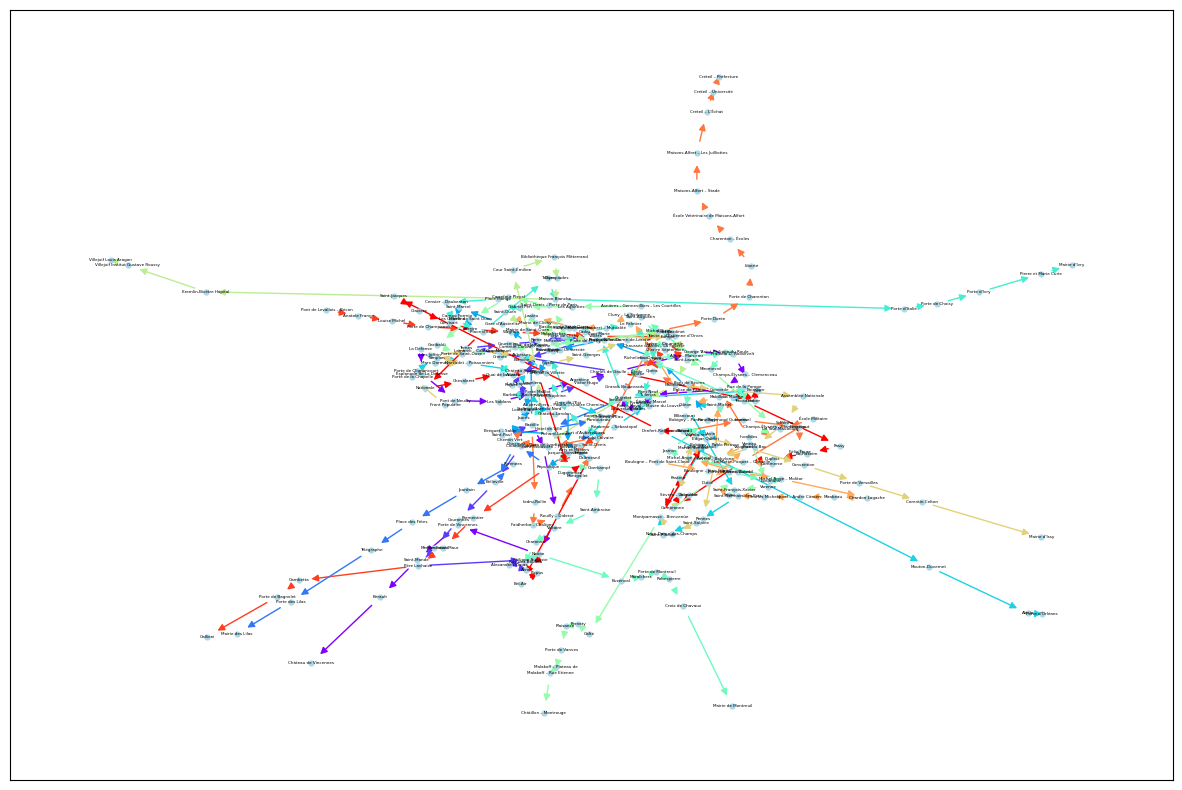

In [36]:
cmap = cm.get_cmap(name='rainbow', lut=len(lines)) # Substitute 'rainbow' with any colormap you like


# Create a color map using the colormap
color_map = {line: cmap(i) for i, line in enumerate(lines)}

# Get the color of each edge according to the color map
edge_colors = [color_map[G[u][v]['line']] for u, v in G.edges()]

#Draw the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)  # Compute the positions of the nodes

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=12)

# Draw the edges with the specified colors
nx.draw_networkx_edges(G, pos, edge_color=edge_colors)

# Draw the labels with a smaller font size
nx.draw_networkx_labels(G, pos, font_size=3)

plt.savefig("metro_paris1.png", dpi=300)
# Show the graph
plt.show()
